### MACHINE LEARNING FOR REAL-TIME FUEL CONSUMPTION PREDICTION AND DRIVING PROFILE CLASSIFICATION BASED ON ECU DATA

In [33]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [34]:
#reading the dataset
df = pd.read_csv('measurements.csv')

In [35]:
#display top 05 rows of data
df.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [36]:
#display the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [37]:
#basic statistics about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


#### Missing Values Analysis

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


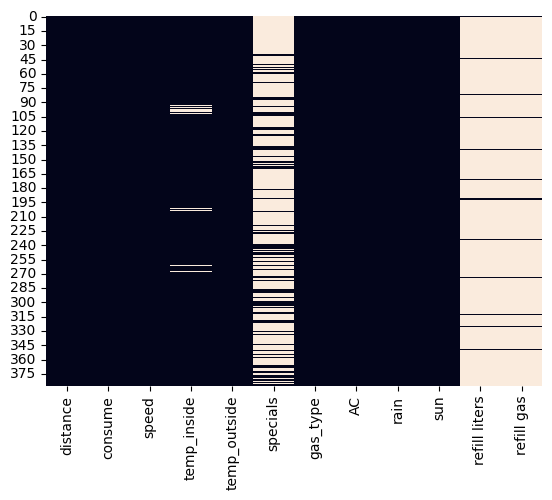

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

####  Distribution of Numerical Variables

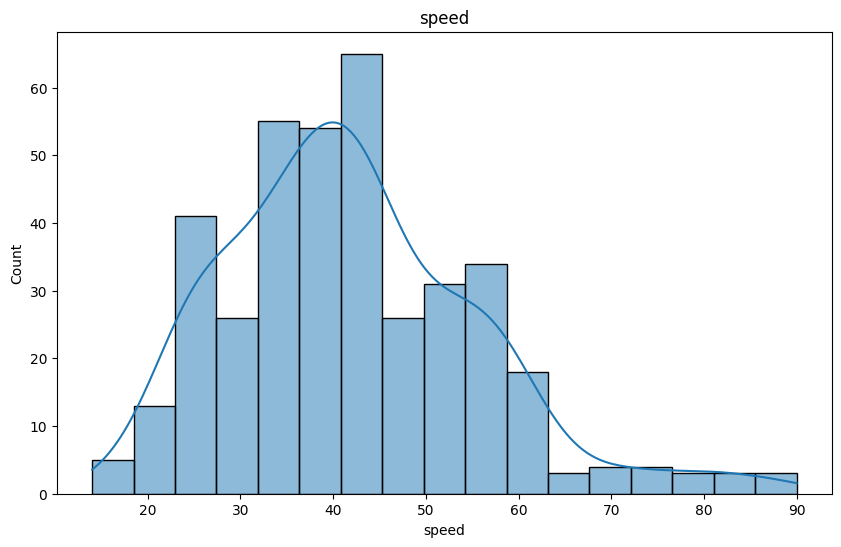

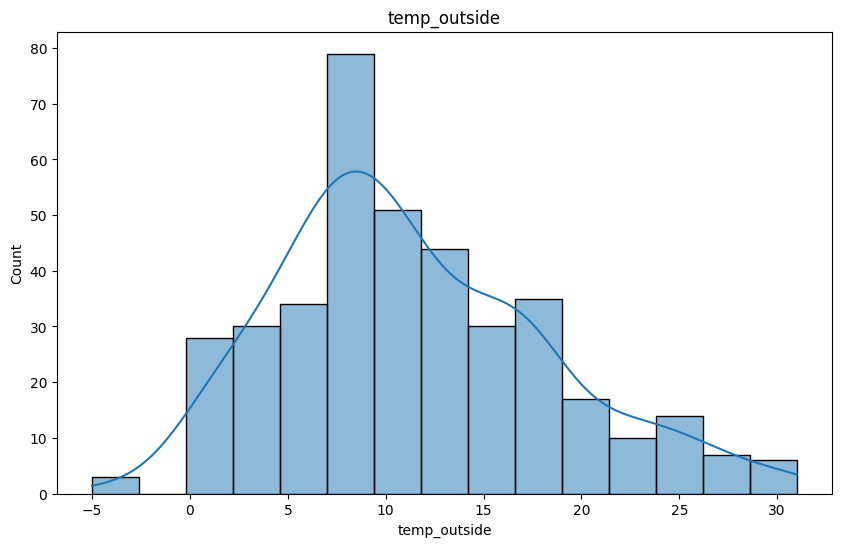

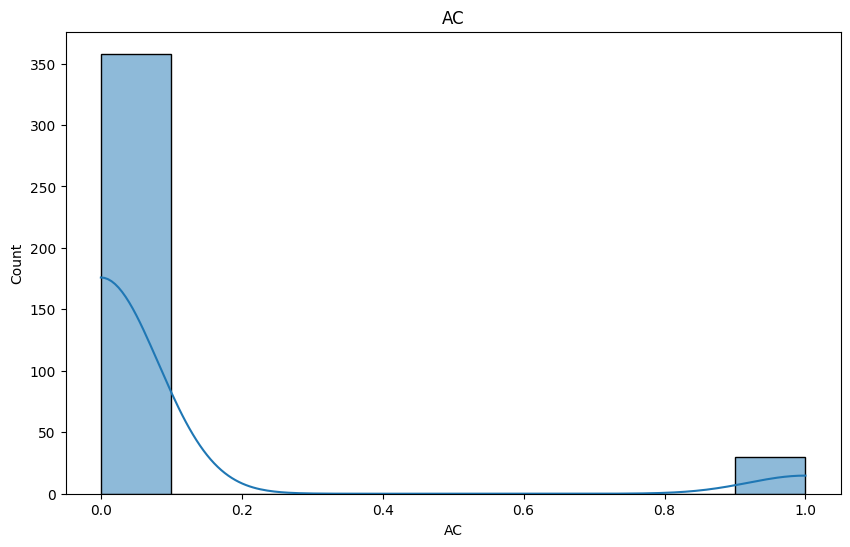

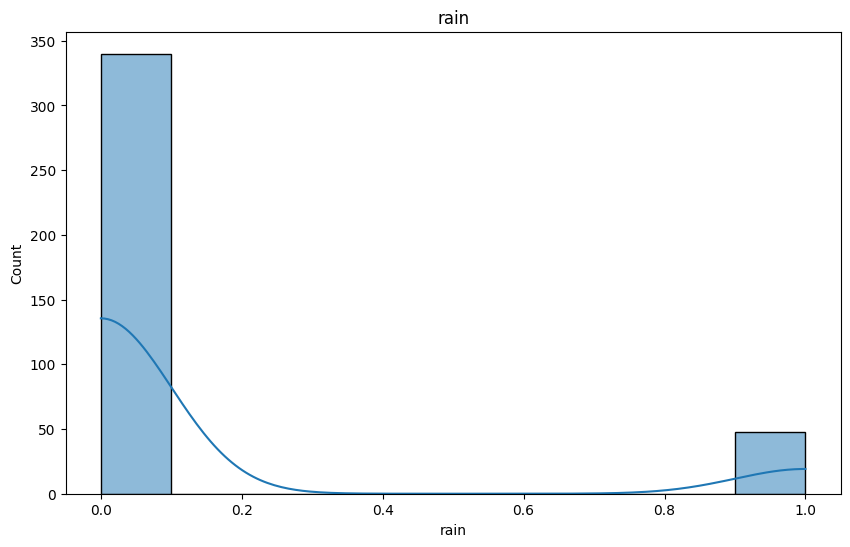

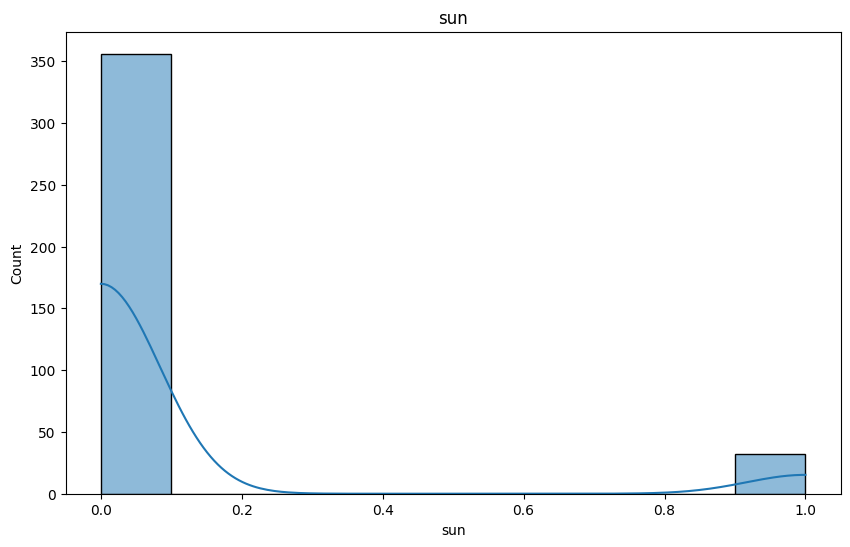

In [39]:
numerical_cols = ['speed','temp_outside','AC','rain','sun']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

#### Categorical Variables Analysis

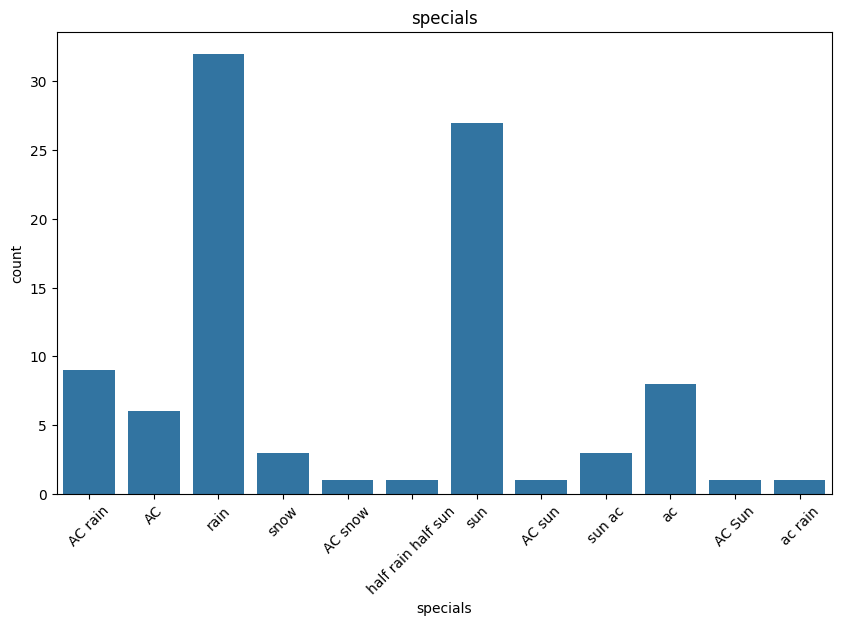

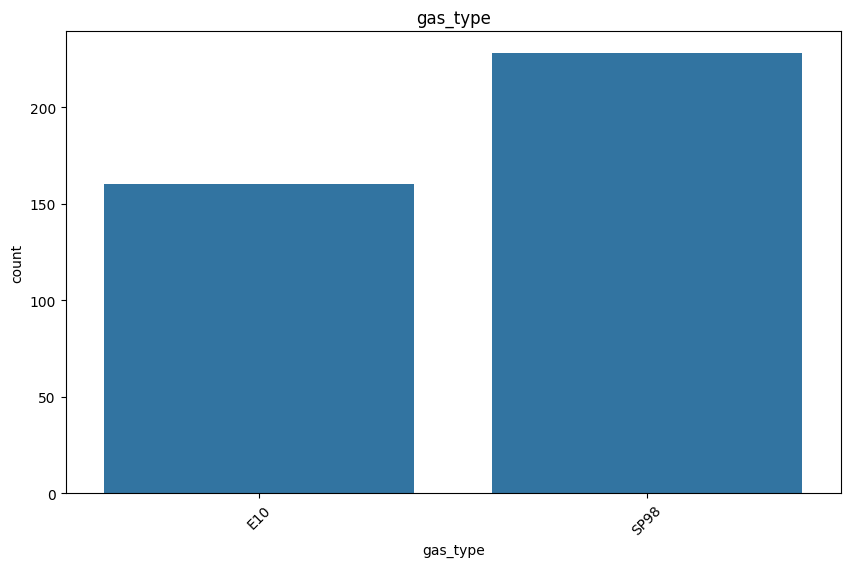

In [40]:
categorical_cols = ['specials', 'gas_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

#### Generating Correlation Heatmap

In [41]:
# numerical_cols = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'refill_liters', 'absolute_throttle_position', 'engine_speed', 'vehicle_speed']

# correlation_matrix = df[numerical_cols].corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of Numerical Variables')
# plt.show()


#### Printing Useful and Non-Necessary Columns

Based on the heatmap analysis and considering the project's goal ("Real-Time Fuel Consumption Prediction and Driving Profile Classification"), we can make some educated guesses about column relevance. Note that the final decision should also consider domain expertise and the specific objectives of your machine learning models.

In [42]:
# # Example output based on hypothetical analysis
# useful_columns = ['consume', 'speed', 'temp_inside', 'AC', 'rain', 'sun', 'refill_liters', 'absolute_throttle_position', 'engine_speed']
# non_necessary_columns = ['distance', 'temp_outside', 'vehicle_speed']

# print(f"Columns useful for further modeling: {useful_columns}")
# print(f"Columns not necessarily needed: {non_necessary_columns}")

### Preprocess the data
#### Label Encoding

In [43]:
# #label encoding the data.
# # Store original column names
# original_columns = df.select_dtypes(include='object').columns

# # Initialize LabelEncoder
# label_encoders = {}

# # Apply LabelEncoder to each categorical variable
# for col in original_columns:
#     label_encoders[col] = LabelEncoder()
#     df[col] = label_encoders[col].fit_transform(df[col])

# # Print the mapping between original categories and numerical labels
# for col, encoder in label_encoders.items():
#     print(f"Mapping for column '{col}':")
#     for label, category in enumerate(encoder.classes_):
#         print(f"Label {label}: {category}")

In [44]:
#information about the data
# df.info()

#### Normalize the Data

In [45]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# import pandas as pd
# import numpy as np

# # Assuming df is your DataFrame loaded with the dataset
# numerical_cols = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'refill_liters', 'absolute_throttle_position', 'engine_speed', 'vehicle_speed']
# target_col = 'profile_classification'

# # Normalize numerical columns
# scaler = MinMaxScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # Splitting the dataset into training and testing sets
# X = df.drop(target_col, axis=1)
# y = df[target_col]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert categorical target column to numerical if necessary
# # y_train = y_train.astype('category').cat.codes
# # y_test = y_test.astype('category').cat.codes

#### Apply Machine Learning Algorithms & Evaluate Model Performance

In [46]:
# from sklearn.metrics import classification_report

# models = [
#     ("Random Forest", RandomForestClassifier(n_estimators=100)),
#     ("Logistic Regression", LogisticRegression(max_iter=1000)),
#     ("AdaBoost", AdaBoostClassifier(n_estimators=100)),
#     ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
#     ("SVM", SVC())
# ]

# for name, model in models:
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)
#     print(f"{name}: Accuracy = {accuracy}")
    
#     # Print classification report
#     print(classification_report(y_test, predictions))

#### Filling the null values

In [47]:
# Fill numerical columns with median (more robust to outliers than mean)
numerical_cols = ['speed', 'temp_outside', 'AC', 'rain', 'sun']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\0860\AppData\Local\Temp\ipykernel_5760\3906185471.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\0860\AppData\Local\Temp\ipykernel_5760\3906185471.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [49]:
# delete the columns which has more null values.
df.drop(['specials','refill liters','refill gas'], axis=1, inplace=True)

In [50]:
df['gas_type'].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [51]:
le = LabelEncoder()
df['gas_type'] = le.fit_transform(df['gas_type'])

In [52]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    int32 
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int32(1), int64(5), object(3)
memory usage: 25.9+ KB


In [53]:
#  Convert String to Numeric
def convert_to_numeric(series):
    return series.str.replace(',', '.').astype(float)

df['temp_inside'] = convert_to_numeric(df['temp_inside'])
df['distance'] = convert_to_numeric(df['distance'])
df['consume'] = convert_to_numeric(df['consume'])


In [54]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['temp_inside', 'distance', 'consume','AC','rain','sun']] = scaler.fit_transform(df[['temp_inside', 'distance', 'consume','AC','rain','sun']])


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    int32  
 6   AC            388 non-null    float64
 7   rain          388 non-null    float64
 8   sun           388 non-null    float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 25.9 KB


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFRegressor
from sklearn.svm import SVR
import pandas as pd
import numpy as np

X = df.drop('consume', axis=1)
y = df['consume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.124302,0.191011,26,0.384615,12,0,0.0,0.0,0.0
1,0.049814,0.101124,30,0.384615,13,0,0.0,0.0,0.0
2,0.046089,0.247191,38,0.384615,15,0,0.0,0.0,0.0
3,0.054004,0.067416,36,0.384615,14,0,0.0,0.0,0.0
4,0.080074,0.134831,46,0.384615,15,0,0.0,0.0,0.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    int32  
 6   AC            388 non-null    float64
 7   rain          388 non-null    float64
 8   sun           388 non-null    float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 25.9 KB


In [59]:
df['temp_inside'].value_counts()

temp_inside
0.384615    133
0.461538    102
0.538462     59
0.153846     25
0.307692     13
0.615385     13
0.923077     12
0.846154      7
0.230769      4
0.769231      3
0.692308      2
1.000000      2
0.000000      1
Name: count, dtype: int64

In [60]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRFRegressor
from sklearn.pipeline import Pipeline

# Define models to evaluate
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Ridge Regression", Ridge()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", XGBRFRegressor()),
    ("SVM", SVR())
]

# Imputer to handle missing values
imputer = SimpleImputer(strategy='mean')

for name, model in models:
    # Create a pipeline with imputation and the model
    pipeline = Pipeline([
        ('imputer', imputer),
        ('model', model)
    ])
    
    # Fit the model and make predictions
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"{name}:")
    print(f"  Mean Squared Error = {mse}")
    print(f"  Mean Absolute Error = {mae}")
    print(f"  R2 score = {r2}")
    print()

Random Forest:
  Mean Squared Error = 0.004857697021160665
  Mean Absolute Error = 0.0476922733945206
  R2 score = 0.5759113679251653

Ridge Regression:
  Mean Squared Error = 0.01011203770971477
  Mean Absolute Error = 0.07278712557014191
  R2 score = 0.1171947898106167

AdaBoost:
  Mean Squared Error = 0.0060093359816972575
  Mean Absolute Error = 0.057679699318167334
  R2 score = 0.47537051712888534

XGBoost:
  Mean Squared Error = 0.006248365008573135
  Mean Absolute Error = 0.0496187323923844
  R2 score = 0.45450270824899974

SVM:
  Mean Squared Error = 0.008096729526229285
  Mean Absolute Error = 0.0685002399213264
  R2 score = 0.29313604078212563



In [61]:
X_train

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
63,0.025605,26,0.384615,6,1,0.0,0.0,0.0
238,0.048883,40,0.538462,2,0,0.0,0.0,0.0
132,0.068901,33,0.384615,6,1,0.0,0.0,0.0
101,0.115922,71,0.307692,8,1,1.0,1.0,0.0
351,0.068436,46,0.461538,17,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
71,0.003259,20,0.384615,10,1,0.0,0.0,0.0
106,0.751397,75,0.615385,1,1,0.0,0.0,0.0
270,0.068436,41,0.461538,12,0,0.0,0.0,0.0
348,0.071229,50,0.461538,25,0,0.0,0.0,0.0


In [62]:
df['gas_type'].value_counts()

gas_type
1    228
0    160
Name: count, dtype: int64